# Project W4: Kaggle-Human Freedom

*Insert intro here*

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Preparing data

In [2]:
data = pd.read_csv('.\datasets\hfi_cc_2018.csv')
data_2 = pd.read_csv('.\datasets\dataset2.csv')

In this section we filter our original datasets. The first dataset had a lot of indicators (79), so we needed to decide which ones we would use. We tackled this issue by finding out the percentage of missing values for each indicator, from there on we decided to drop indicators which had more than 10% missing values, leaving us with ... indicators. We didn't have full data on all countries, since some were added to the Human Freedom Index later on. In order to get a more accurate results, we found countries with missing data and removed them. While filtering the second dataset, it turned out that data before 2010 wasn't sufficient, so we removed years 2008 and 2009 from our first dataset.

### First dataset  -insert name here-

In [3]:
pd.set_option('display.max_rows', None)

 # Mitu % andmetest on puudu

data = data[[
'year',
'countries',
'region',
'pf_rol',
'pf_ss_homicide',
'pf_ss_disappearances',
'pf_ss_women_missing',
'pf_ss_women_inheritance',
'pf_ss_women',
'pf_ss',
'pf_movement',
'pf_religion',
'pf_expression',
'pf_identity_parental',
'pf_identity_sex',
'pf_score',
'pf_rank',
'ef_government_tax_income',
'ef_government_tax',
'ef_government',
'ef_legal_military',
'ef_legal_enforcement',
'ef_legal_police',
'ef_legal',
'ef_money_growth',
'ef_money_inflation',
'ef_money',
'ef_trade_tariffs_mean',
'ef_trade_regulatory',
'ef_trade_black',
'ef_trade_movement_capital',
'ef_trade_movement_visit',
'ef_trade_movement',
'ef_trade',
'hf_score',
'hf_rank',]]

#### We have picked out the following inidicators:

| Indicator name | Explanation |
|------|------|
| Year | - |
| Countries | Name of country |
| Region | - |
| pf_rol | Rule of law |
| pf_ss_homicide | Homicide |
| pf_ss_disappearances | Disappearances, conflict, and terrorism |
| pf_ss_women_missing | Missing women |
| pf_ss_women_inheritance | Inheritance |
| pf_ss_women | Women's security |
| pf_ss | Security and safety |
| pf_movement | Freedom of movement |
| pf_religion | Religious freedom |
| pf_expression | Freedom of expression |
| pf_identity_parental | Parental rights |
| pf_identity_sex | Same-sex ralitionships |
| pf_score | Personal Freedom (score) |
| pf_rank | Personal Freedom (rank) |
| ef_government_tax_income | Top marginal income tax rate |
| ef_government_tax | Top marginal tax rate |
| ef_government | Size of government |
| ef_legal_military | Military interference in rule of law and politics |
| ef_legal_enforcement | Legal enforcement of contracts |
| ef_legal_police | Reliability of police |
| ef_legal | Legal system and property rights |
| ef_money_growth | Money growth |
| ef_money_inflation | Inflation: most recent year |
| ef_money | Sound money |
| ef_trade_tariffs_mean | Mean tariff rate |
| ef_trade_regulatory | Regulatory trade barriers |
| ef_trade_black | Black-market exchange rates |
| ef_trade_movement_capital | Capital controls |
| ef_trade_movement_visit | Freedom of foreigners to visit |
| ef_trade_movement | Controls of the movement of capital and people |
| ef_trade | Freedom to trade internationally |
| hf_score | Human Freedom (score) |
| hf_rank | Human Freedom (rank) |

In [4]:
eemaldatavad_riigid = set(data.loc[(data["pf_rank"].isnull()) & (data["year"] == 2010)]["countries"].tolist()) #Valime välja riigid millel puudub varasem info

eemaldatavad_aastad = [2008, 2009]

for riik in eemaldatavad_riigid:
    data = data[~data["countries"].isin(eemaldatavad_riigid)] #Eemaldame riigid

for aasta in eemaldatavad_aastad:
    data = data[~data["year"].isin(eemaldatavad_aastad)] #Eemaldame aastad mille kohta meil on vähem infot

olemasolevad_riigid = set(data["countries"].tolist())

#### We removed the following countries from our data:

In [5]:
print(*eemaldatavad_riigid, sep = ", ")

Bhutan, Laos, Seychelles, Belarus, Sudan, Guinea, Iraq, Liberia, Libya


### Second dataset -insert name here-

We went through a similar procedure with our second dataset. At first we chose indicators that interested us, later on we found the percentage of missing values for all indicators and made adjustments in our choices. Since the data before 2010 had a lot of missing values, we decided to narrow our data down to 2010 - 2018.

In [6]:
before_2016_data = data_2[data_2['Year'] == 2008]
before_2016_data['Year'].value_counts()
temp_data = before_2016_data[before_2016_data.isnull().sum(axis = 1) < 2]
temp_data.isnull().sum(axis = 1)
data_2 = data_2[data_2["Country Name"].isin(olemasolevad_riigid)] #Valime samad riigid mida kasutame esimeses andmestikus


In [7]:
print("Indicator, % of missing values")
print(data_2.isnull().mean() * 100)
eemaldatavad_tulbad = ["Expense (% of GDP)", "Revenue, excluding grants (% of GDP)", "Population, female", "Population, male"]
data_2 = data_2.drop(eemaldatavad_tulbad, axis = 1)

Indicator, % of missing values
Country Name                                            0.000000
Expense (% of GDP)                                     25.373134
Land area (sq. km)                                      0.000000
Life expectancy at birth, total (years)                 0.000000
Military expenditure (% of GDP)                         5.597015
Population density (people per sq. km of land area)     0.000000
Population, female                                      0.000000
Population, male                                        0.000000
Population, total                                       0.000000
Revenue, excluding grants (% of GDP)                   23.880597
Year                                                    0.000000
GDP                                                     0.000000
dtype: float64


#### We are left with the following indicators:

In [8]:
print(*data_2.columns.tolist(), sep = ", ")

Country Name, Land area (sq. km), Life expectancy at birth, total (years), Military expenditure (% of GDP), Population density (people per sq. km of land area), Population, total, Year, GDP


#### Since this dataset didn't have GPD we decided to add it:

In [9]:
gdp_data = pd.read_csv('.\datasets\gdp_data.csv')

gdp_data = gdp_data.drop(columns=['Country Code', 'Series Name', 'Series Code', '1990 [YR1990]', '2000 [YR2000]', '2019 [YR2019]', '2017 [YR2017]', '2018 [YR2018]'])

for year in range(2010, 2017, 1):
    gdp_data.rename(columns={(str(year) + " [YR" + str(year) + "]"): year}, inplace=True)

gdp_data = gdp_data.melt(id_vars=["Country Name"], 
        var_name="Year", 
        value_name="GDP")

#gdp_data = gdp_data.loc[gdp_data['Country Name'] in data_2['Country Name']]

gdp_data = gdp_data.reset_index()
for i in range(len(gdp_data)):
    if (gdp_data.loc[i]['Country Name']) not in set(data_2['Country Name']):
        gdp_data = gdp_data.drop(i, axis=0)

#data_2 = data_2.merge(gdp_data, on=['Country Name', 'Year'], how='inner').drop(columns=['index'])
#data_2.to_csv("dataset2.csv", index=False)

#### Now that both of our datasets are prepared, we will merge them:

In [10]:
data_2 = data_2.rename(columns={'Year': 'year', 'Country Name': 'countries'}) #renaming some columns for merging purposes

merged_data = pd.merge(data, data_2, on=['year', 'countries'])

## Finding correlations

In this section our goal was to find correlations between all indicators from both of the datasets we prepared. We left out indicators that didn't have much significance, such as year, pf and hf rank, pf and hf score. Once the correlations were found, we visualized them with a heatmap which you can see below. We reported the most notable correlations and tried to explain the reasoning behind them.

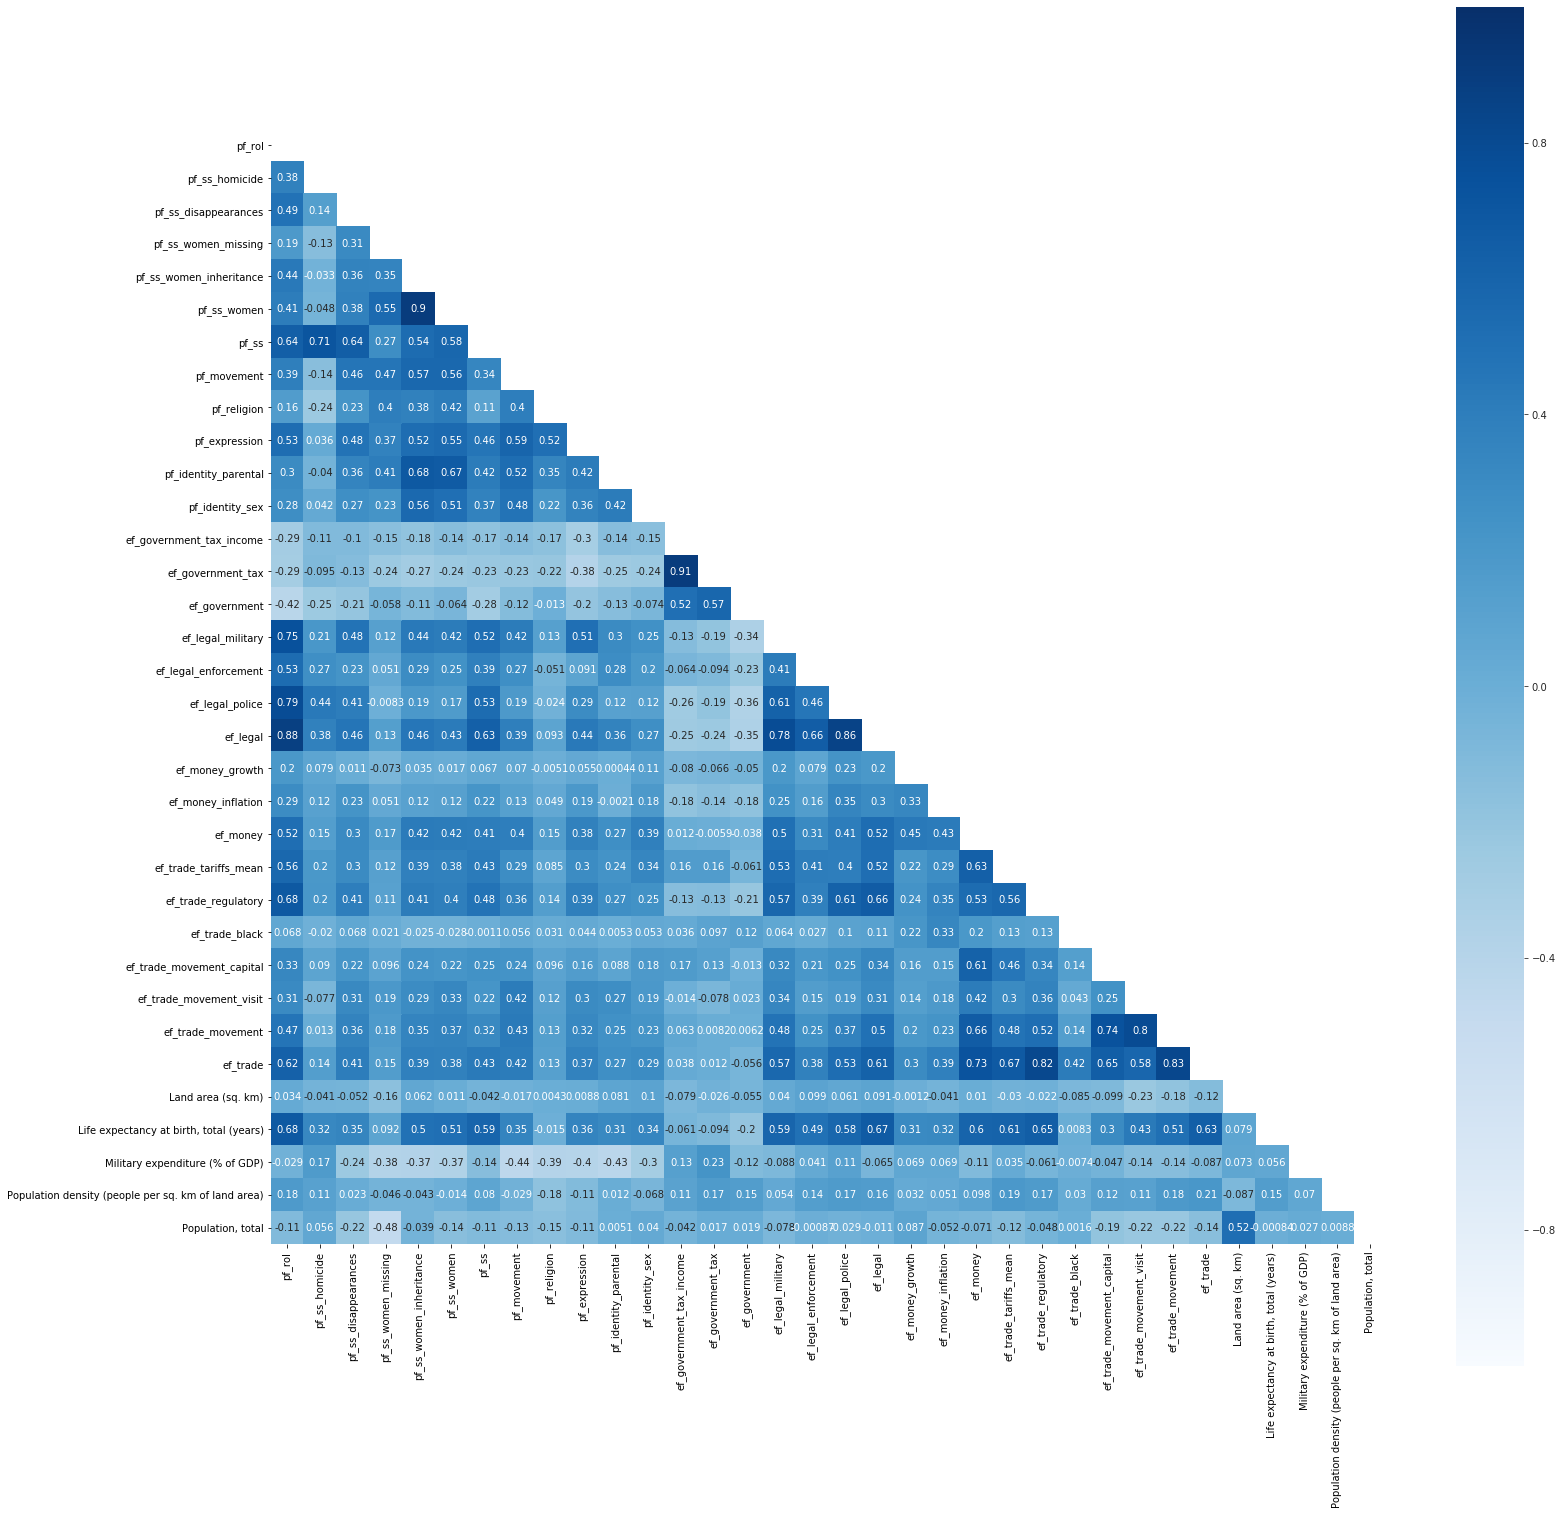

In [11]:
correlations = merged_data.drop(columns = ["year", "pf_rank", "pf_score", "hf_rank", "hf_score"]).corr()
fig, ax = plt.subplots(figsize=(25,25))
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(correlations, square = True, annot = True,vmin = -1,ax = ax, mask = mask, cmap = "Blues")
bottom, top = ax.get_ylim()
ax = ax.set_ylim(bottom + 0.5, top - 0.5) # This prevents top and bottom values from cutting off

#### Highest correlations

Most of the strongly correlated values were between pairs that were very similar to each other, such as rule of law and legal system and property rights; freedom to trade internationally and controls over trade; reliability of police and legal system and so on. It was very interesting to see the effects of other indicators on life expectancy. The following indicators had the most effect: rule of law, security and safety, military interference in law and politics, legal systems and freedom to trade. 

### Plotting correlations between the Human Freedom score and other indicators

In [42]:
compare_To = correlations.columns
pf_ind = []
ef_ind = []
other_ind = []

for ind in compare_To:
    if "pf_" in ind:
        pf_ind.append(ind)
    elif "ef_" in ind:
        ef_ind.append(ind)
    else:
        other_ind.append(ind)

#### Indicators related to personal freedom

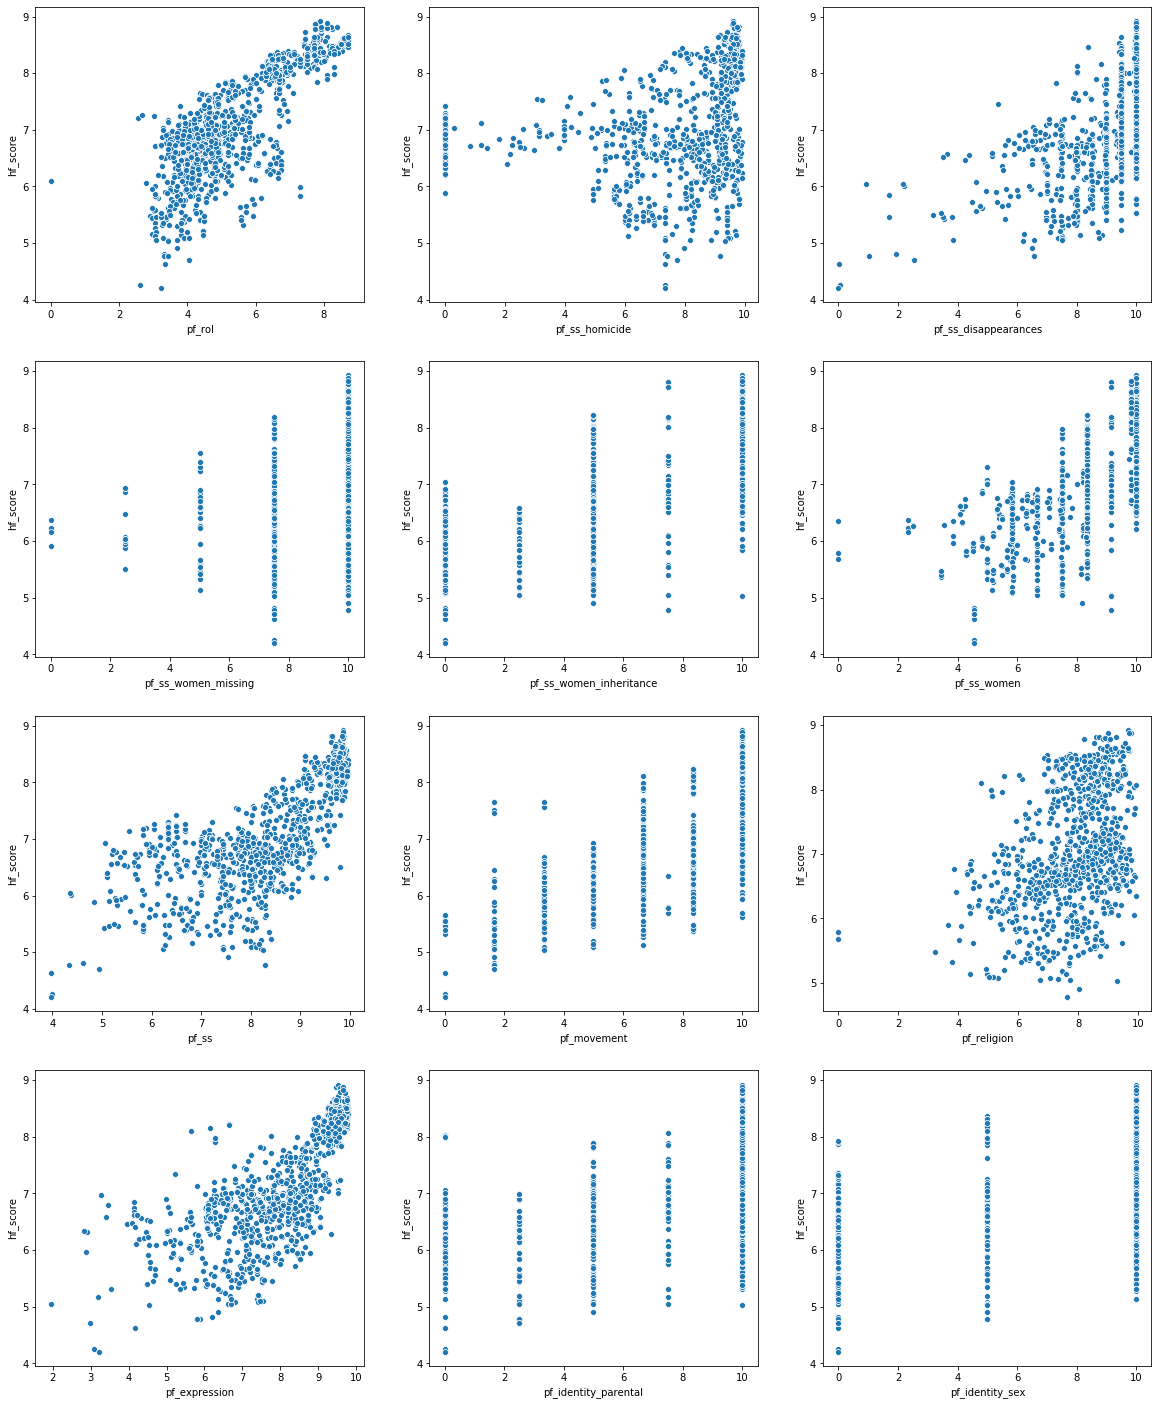

In [41]:
fig, axs = plt.subplots(4, 3,figsize=(20, 25))
row = 0
col = 0
for i in pf_ind:
    sns.scatterplot(x=i, y="hf_score", data=merged_data, ax = axs[row, col])
    if col != 2:
        col += 1
    else:
        col = 0
        row += 1


#### Indicators related to economic freedom

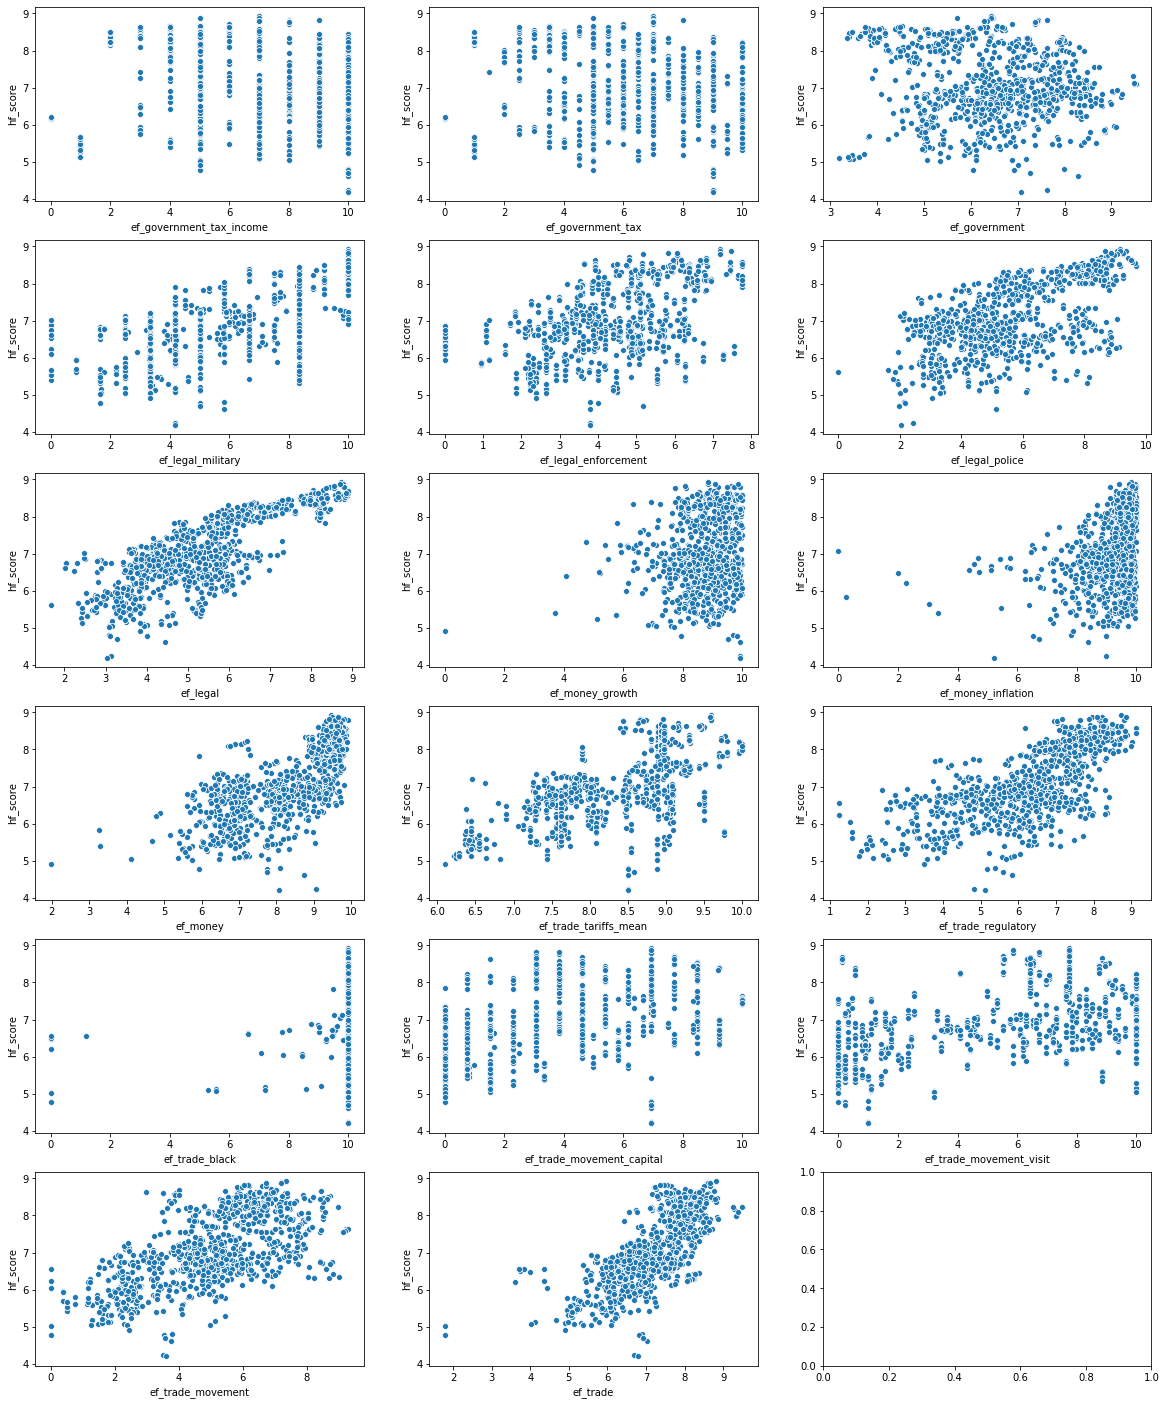

In [51]:
fig, axs = plt.subplots(6, 3,figsize=(20, 25))
row = 0
col = 0
for i in ef_ind:
    sns.scatterplot(x=i, y="hf_score", data=merged_data, ax = axs[row, col])
    if col != 2:
        col += 1
    else:
        col = 0
        row += 1


#### Other indicators

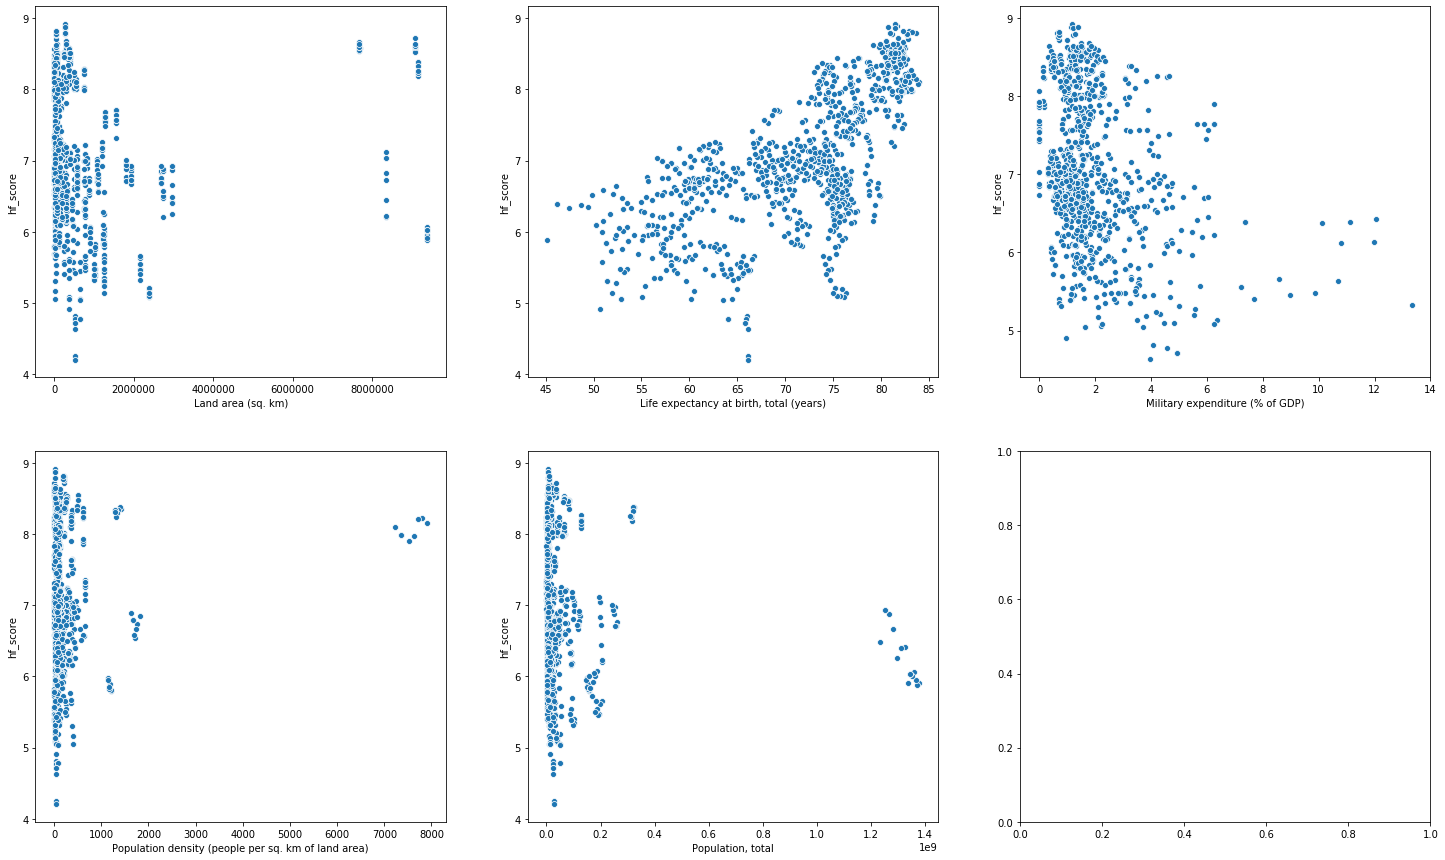

In [56]:
fig, axs = plt.subplots(2, 3,figsize=(25, 15))
row = 0
col = 0
for i in other_ind:
    sns.scatterplot(x=i, y="hf_score", data=merged_data, ax = axs[row, col])
    if col != 2:
        col += 1
    else:
        col = 0
        row += 1


## Countries with the highest and lowest freedom rating over time

In this section we highlighted countries with the highest and lowest freedom score for each year between 2010-2016. Once the data was collected, we made illustrative graphs depicting changes in the human freedom score over time.

#### Highest rank of human freedom in every year 2010-2016

In [12]:
top = [] # Here we will keep names of countries with the highest freedom rank over time
bottom = [] # Lowest freedom rank over time
means = []
for i in range (2010, 2017):
    best = merged_data[merged_data['year'] == i].sort_values(by=['hf_rank'])
    top10 = best[['year', 'countries', 'hf_rank']].head(10)
    for country in top10['countries']:
        top.append(country)
    means.append(merged_data.loc[merged_data['year'] == i]['hf_score'].mean())
    display(top10)

,year,countries,hf_rank
1026,2010,New Zealand,2.0
1053,2010,Switzerland,3.0
977,2010,Finland,4.0
962,2010,Canada,5.0
943,2010,Australia,5.0
971,2010,Denmark,7.0
1030,2010,Norway,8.0
1052,2010,Sweden,9.0
1065,2010,United Kingdom,10.0
974,2010,Estonia,11.0


,year,countries,hf_rank
847,2011,New Zealand,2.0
846,2011,New Zealand,2.0
900,2011,Switzerland,3.0
901,2011,Switzerland,3.0
749,2011,Finland,4.0
748,2011,Finland,4.0
719,2011,Canada,5.0
718,2011,Canada,5.0
680,2011,Australia,6.0
681,2011,Australia,6.0


,year,countries,hf_rank
624,2012,New Zealand,2.0
651,2012,Switzerland,3.0
575,2012,Finland,4.0
560,2012,Canada,5.0
628,2012,Norway,6.0
541,2012,Australia,7.0
569,2012,Denmark,8.0
592,2012,Ireland,9.0
663,2012,United Kingdom,10.0
650,2012,Sweden,11.0


,year,countries,hf_rank
490,2013,New Zealand,2.0
517,2013,Switzerland,3.0
426,2013,Canada,4.0
435,2013,Denmark,5.0
441,2013,Finland,6.0
494,2013,Norway,6.0
407,2013,Australia,8.0
458,2013,Ireland,9.0
529,2013,United Kingdom,10.0
408,2013,Austria,11.0


,year,countries,hf_rank
356,2014,New Zealand,1.0
383,2014,Switzerland,3.0
292,2014,Canada,4.0
273,2014,Australia,5.0
307,2014,Finland,6.0
301,2014,Denmark,7.0
338,2014,Luxembourg,8.0
360,2014,Norway,8.0
395,2014,United Kingdom,10.0
274,2014,Austria,10.0


,year,countries,hf_rank
222,2015,New Zealand,1.0
249,2015,Switzerland,3.0
190,2015,Ireland,4.0
139,2015,Australia,5.0
173,2015,Finland,6.0
221,2015,Netherlands,7.0
167,2015,Denmark,8.0
261,2015,United Kingdom,9.0
226,2015,Norway,10.0
158,2015,Canada,10.0


,year,countries,hf_rank
88,2016,New Zealand,1.0
115,2016,Switzerland,2.0
5,2016,Australia,4.0
24,2016,Canada,5.0
33,2016,Denmark,6.0
87,2016,Netherlands,6.0
56,2016,Ireland,8.0
127,2016,United Kingdom,8.0
92,2016,Norway,10.0
39,2016,Finland,10.0


In [13]:
top = list(set(top))
top1 = top[7:] # Divided top countries into two lists to make more visually appealing graphs
top2 = top[:7]
topData1 = merged_data[merged_data["countries"].isin(top1)][["countries", "year", "hf_score"]]
topData2 = merged_data[merged_data["countries"].isin(top2)][["countries", "year", "hf_score"]]

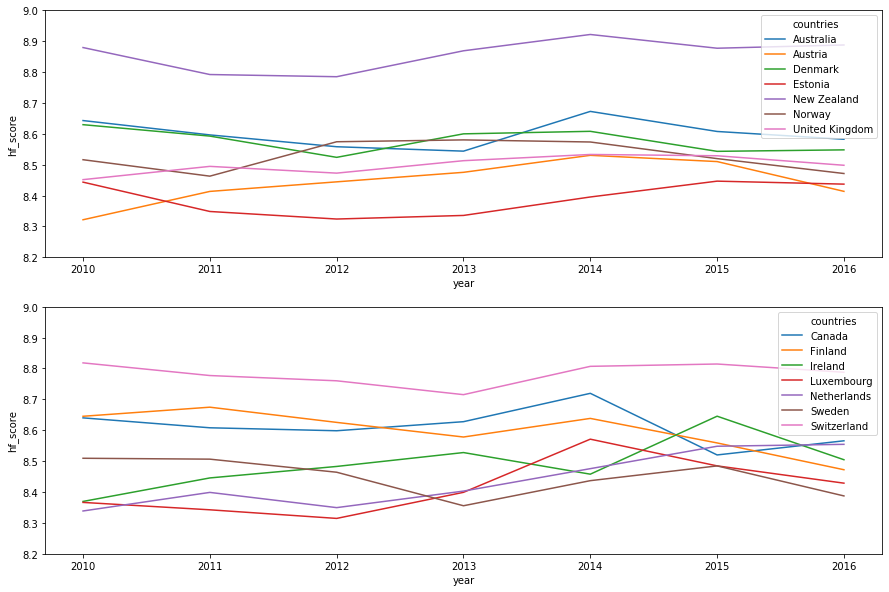

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))


ax1 = ax[0]
ax2 = ax[1]
ax1.set_ylim(8.2, 9.0)
ax2.set_ylim(8.2, 9.0)
sns.lineplot(x = "year", y="hf_score", data=topData1, hue = "countries", ax = ax[0])
sns.lineplot(x = "year", y="hf_score", data=topData2, hue = "countries", ax = ax[1])

#### Lowest rank of human freedom in every year 2010-2016

In [15]:
for i in range (2010, 2017):
    worst = merged_data[merged_data['year'] == i].sort_values(by=['hf_rank'], ascending=False)
    bottom10 = worst[['year', 'countries', 'hf_rank']].head(10)
    for country in bottom10['countries']:
        bottom.append(country)
    display(bottom10)

,year,countries,hf_rank
1071,2010,Zimbabwe,153.0
1022,2010,Myanmar,152.0
939,2010,Algeria,151.0
940,2010,Angola,147.0
1069,2010,"Yemen, Rep.",146.0
975,2010,Ethiopia,144.0
1032,2010,Pakistan,143.0
963,2010,Chad,141.0
1042,2010,Saudi Arabia,140.0
1058,2010,Togo,139.0


,year,countries,hf_rank
933,2011,"Yemen, Rep.",153.0
932,2011,"Yemen, Rep.",153.0
838,2011,Myanmar,152.0
839,2011,Myanmar,152.0
937,2011,Zimbabwe,148.0
936,2011,Zimbabwe,148.0
672,2011,Algeria,147.0
673,2011,Algeria,147.0
720,2011,Chad,146.0
721,2011,Chad,146.0


,year,countries,hf_rank
667,2012,"Yemen, Rep.",152.0
620,2012,Myanmar,148.0
669,2012,Zimbabwe,147.0
537,2012,Algeria,146.0
561,2012,Chad,145.0
640,2012,Saudi Arabia,142.0
656,2012,Togo,141.0
573,2012,Ethiopia,139.0
630,2012,Pakistan,139.0
557,2012,Burundi,138.0


,year,countries,hf_rank
533,2013,"Yemen, Rep.",155.0
403,2013,Algeria,151.0
486,2013,Myanmar,150.0
427,2013,Chad,149.0
535,2013,Zimbabwe,146.0
506,2013,Saudi Arabia,145.0
478,2013,Mauritania,143.0
496,2013,Pakistan,143.0
450,2013,Guinea-Bissau,142.0
439,2013,Ethiopia,140.0


,year,countries,hf_rank
399,2014,"Yemen, Rep.",155.0
269,2014,Algeria,152.0
289,2014,Burundi,151.0
305,2014,Ethiopia,149.0
309,2014,Gabon,147.0
344,2014,Mauritania,147.0
401,2014,Zimbabwe,145.0
362,2014,Pakistan,145.0
293,2014,Chad,144.0
352,2014,Myanmar,142.0


,year,countries,hf_rank
265,2015,"Yemen, Rep.",158.0
155,2015,Burundi,153.0
135,2015,Algeria,152.0
238,2015,Saudi Arabia,149.0
171,2015,Ethiopia,148.0
210,2015,Mauritania,147.0
159,2015,Chad,146.0
218,2015,Myanmar,145.0
157,2015,Cameroon,144.0
175,2015,Gabon,143.0


,year,countries,hf_rank
131,2016,"Yemen, Rep.",160.0
1,2016,Algeria,155.0
21,2016,Burundi,154.0
37,2016,Ethiopia,150.0
84,2016,Myanmar,149.0
25,2016,Chad,147.0
76,2016,Mauritania,147.0
104,2016,Saudi Arabia,146.0
41,2016,Gabon,144.0
23,2016,Cameroon,144.0


In [16]:
bottom = list(set(bottom))
bottom1 = bottom[7:] # Divided top countries into two lists to make more visually appealing graphs
bottom2 = bottom[:7]
bottomData1 = merged_data[merged_data["countries"].isin(bottom1)][["countries", "year", "hf_score"]]
bottomData2 = merged_data[merged_data["countries"].isin(bottom2)][["countries", "year", "hf_score"]]

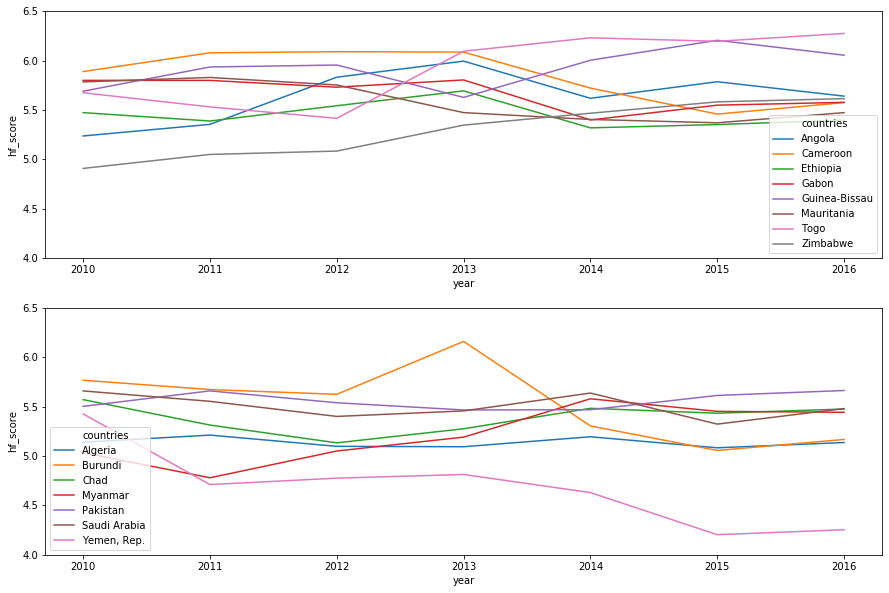

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))
ax1 = ax[0]
ax2 = ax[1]
ax1.set_ylim(4.0, 6.5)
ax2.set_ylim(4.0, 6.5)
sns.lineplot(x = "year", y="hf_score", data=bottomData1, hue = "countries", ax = ax[0])
sns.lineplot(x = "year", y="hf_score", data=bottomData2, hue = "countries", ax = ax[1])

#### Human freedom score mean over time compared to Estonia

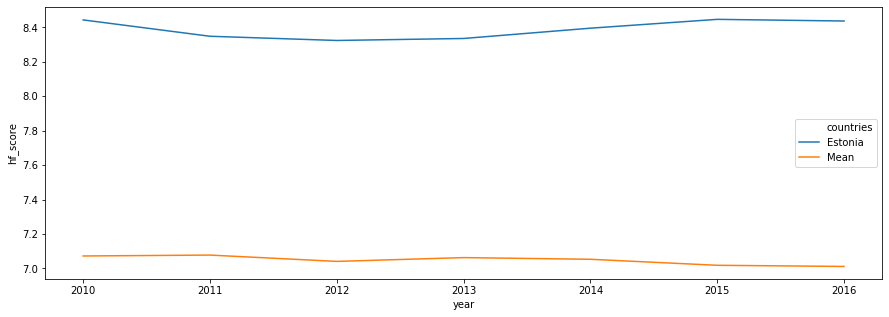

In [18]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
fig, ax = plt.subplots(figsize=(15,5))
data_est = merged_data.loc[merged_data['countries'] == 'Estonia'][['countries', 'year', 'hf_score']].sort_values(by = ['year'])

df_means = pd.DataFrame(list(zip(years, means)), columns =['year', 'hf_score'])
df_means['countries'] = 'Mean'
df_means = df_means[['countries', 'year', 'hf_score']]
data_est = pd.concat([data_est, df_means])
sns.lineplot(x = 'year', y = 'hf_score', data = data_est, hue = "countries")

#### Comparing New Zealand (blue) and Yemen (red)

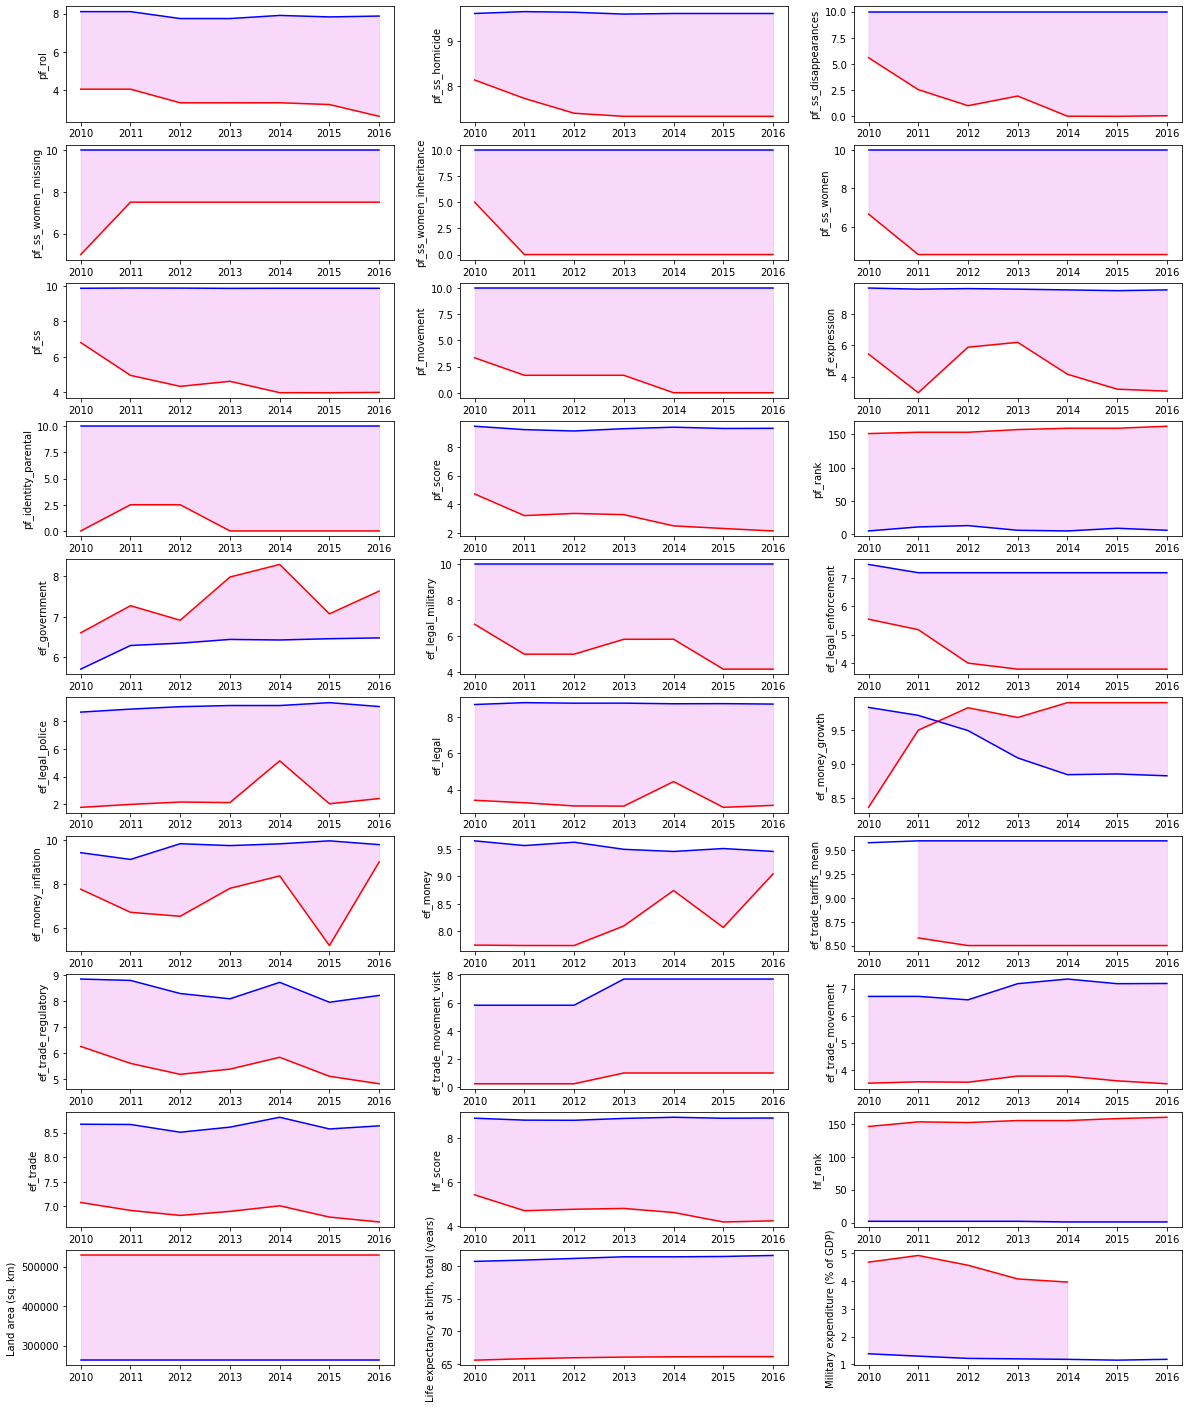

In [19]:
df_Zeal = merged_data.loc[merged_data['countries'] == 'New Zealand']
df_Yem = merged_data.loc[merged_data['countries'] == 'Yemen, Rep.']
indicators = df_Zeal.columns.tolist()
indicators = indicators[3:] # leaving out unnecessary columns
indicators = indicators[:-2]
indicators.remove('pf_religion')
indicators.remove('ef_trade_black')
indicators.remove('ef_trade_movement_capital')
indicators.remove('ef_government_tax')
indicators.remove('ef_government_tax_income')
indicators.remove('pf_identity_sex')
indicators.remove('Population density (people per sq. km of land area)')
df_comparison = pd.concat([df_Zeal, df_Yem])
row = 0
col = 0
df_Zeal = df_Zeal.sort_values(by = ['year'])
df_Yem = df_Yem.sort_values(by = ['year'])

fig, axs = plt.subplots(10, 3,figsize=(20, 25))
for i in indicators:
    yem = df_Yem[i].tolist()
    years = df_Yem['year'].tolist()
    zeal = df_Zeal[i].tolist()
    axs[row, col].plot(years, yem, color = 'red', label = "Yemen")
    axs[row, col].plot(years, zeal, color = 'blue')
    axs[row, col].set_ylabel(i)
    #axs[row, col].set_title("Difference in " + str(i) + " between New Zealand (blue) and Yemen (red)")
    axs[row, col].fill_between(years, yem, zeal, color='violet', alpha='0.3')
    #plt.tight_layout()
    if col != 2:
        col += 1
    else:
        col = 0
        row += 1

#### Over the time best and worst score of human freedom

In [20]:
worst = merged_data.sort_values(by=['hf_score'])
worst[['year', 'countries', 'hf_score', 'hf_rank']].head(30)

,year,countries,hf_score,hf_rank
265,2015,"Yemen, Rep.",4.203442,158.0
131,2016,"Yemen, Rep.",4.253278,160.0
399,2014,"Yemen, Rep.",4.629535,155.0
932,2011,"Yemen, Rep.",4.710594,153.0
933,2011,"Yemen, Rep.",4.710594,153.0
667,2012,"Yemen, Rep.",4.775506,152.0
839,2011,Myanmar,4.779236,152.0
838,2011,Myanmar,4.779236,152.0
533,2013,"Yemen, Rep.",4.812705,155.0
1071,2010,Zimbabwe,4.909415,153.0


In [21]:
best = merged_data.sort_values(by=['hf_score'], ascending=False)
best[['year', 'countries', 'hf_score', 'hf_rank']].head(10)

,year,countries,hf_score,hf_rank
356,2014,New Zealand,8.921386,1.0
88,2016,New Zealand,8.887410,1.0
1026,2010,New Zealand,8.879077,2.0
222,2015,New Zealand,8.876890,1.0
490,2013,New Zealand,8.868585,2.0
1053,2010,Switzerland,8.818141,3.0
249,2015,Switzerland,8.814458,3.0
383,2014,Switzerland,8.806932,3.0
846,2011,New Zealand,8.791730,2.0
847,2011,New Zealand,8.791730,2.0


#### According to findings New Zealand has the best rating of human freedom over time and Yemen the worst. Let's find out more about these 2 countries.

In [22]:
merged_data.loc[merged_data['countries'] == 'New Zealand']

,year,countries,region,pf_rol,pf_ss_homicide,pf_ss_disappearances,pf_ss_women_missing,pf_ss_women_inheritance,pf_ss_women,pf_ss,...,ef_trade_movement,ef_trade,hf_score,hf_rank,Land area (sq. km),"Life expectancy at birth, total (years)",Military expenditure (% of GDP),Population density (people per sq. km of land area),"Population, total",GDP
88,2016,New Zealand,Oceania,7.868546,9.605842,10.0,10.0,10.0,10.0,9.868614,...,7.192230,8.635971,8.887410,1.0,263310.0,81.612439,1.179150,17.823858,4693200.0,187854022728.459
222,2015,New Zealand,Oceania,7.823437,9.605842,10.0,10.0,10.0,10.0,9.868614,...,7.184420,8.573081,8.876890,1.0,263310.0,81.456829,1.149189,17.453572,4595700.0,177208110322.704
356,2014,New Zealand,Oceania,7.901097,9.605842,10.0,10.0,10.0,10.0,9.868614,...,7.355079,8.810715,8.921386,1.0,263310.0,81.404878,1.177966,17.126961,4509700.0,200834001603.85
490,2013,New Zealand,Oceania,7.738095,9.592698,10.0,10.0,10.0,10.0,9.864233,...,7.184612,8.609949,8.868585,2.0,263310.0,81.407317,1.196637,16.870229,4442100.0,190784384693.441
624,2012,New Zealand,Oceania,7.738095,9.632924,10.0,10.0,10.0,10.0,9.877641,...,6.588459,8.506678,8.784639,2.0,263310.0,81.156098,1.212595,16.741104,4408100.0,176193696737.934
846,2011,New Zealand,Oceania,8.100000,9.646928,10.0,10.0,10.0,10.0,9.882309,...,6.716878,8.664495,8.791730,2.0,263310.0,80.904878,1.294277,16.649577,4384000.0,168461998741.295
847,2011,New Zealand,Oceania,8.100000,9.646928,10.0,10.0,10.0,10.0,9.882309,...,6.716878,8.664495,8.791730,2.0,263310.0,80.904878,1.294277,16.649577,4384000.0,168461998741.295
1026,2010,New Zealand,Oceania,8.100000,9.606413,10.0,10.0,10.0,10.0,9.868804,...,6.715177,8.669117,8.879077,2.0,263310.0,80.702439,1.379427,16.523110,4350700.0,146583831538.331


In [23]:
merged_data.loc[merged_data['countries'] == 'Yemen, Rep.']

,year,countries,region,pf_rol,pf_ss_homicide,pf_ss_disappearances,pf_ss_women_missing,pf_ss_women_inheritance,pf_ss_women,pf_ss,...,ef_trade_movement,ef_trade,hf_score,hf_rank,Land area (sq. km),"Life expectancy at birth, total (years)",Military expenditure (% of GDP),Population density (people per sq. km of land area),"Population, total",GDP
131,2016,"Yemen, Rep.",Middle East & North Africa,2.623957,7.336599,0.056860,7.5,0.0,4.566667,3.986708,...,3.493863,6.683847,4.253278,160.0,527970.0,66.087,NaN,51.457867,27168210.0,30968242967.7823
265,2015,"Yemen, Rep.",Middle East & North Africa,3.240893,7.336599,0.000000,7.5,0.0,4.566667,3.967755,...,3.601606,6.782912,4.203442,158.0,527970.0,66.085,NaN,50.188247,26497889.0,42628328212.1041
399,2014,"Yemen, Rep.",Middle East & North Africa,3.333411,7.336599,0.010388,7.5,0.0,4.566667,3.971218,...,3.772903,7.011854,4.629535,155.0,527970.0,66.066,3.966891,48.910895,25823485.0,43228585321.3272
533,2013,"Yemen, Rep.",Middle East & North Africa,3.331610,7.336599,1.938489,7.5,0.0,4.566667,4.613918,...,3.777667,6.898618,4.812705,155.0,527970.0,66.016,4.079527,47.629807,25147109.0,40415233436.1767
667,2012,"Yemen, Rep.",Middle East & North Africa,3.331610,7.405055,1.014651,7.5,0.0,4.566667,4.328791,...,3.550799,6.816535,4.775506,152.0,527970.0,65.920,4.573884,46.353350,24473178.0,35401339869.3055
932,2011,"Yemen, Rep.",Middle East & North Africa,4.043714,7.732165,2.548288,7.5,0.0,4.566667,4.949040,...,3.565054,6.918146,4.710594,153.0,527970.0,65.768,4.926462,45.092691,23807588.0,32726417878.391
933,2011,"Yemen, Rep.",Middle East & North Africa,4.043714,7.732165,2.548288,7.5,0.0,4.566667,4.949040,...,3.565054,6.918146,4.710594,153.0,527970.0,65.768,4.926462,45.092691,23807588.0,32726417878.391
1069,2010,"Yemen, Rep.",Middle East & North Africa,4.043714,8.137823,5.599981,5.0,5.0,6.666667,6.801490,...,3.514609,7.079297,5.425224,146.0,527970.0,65.549,4.685557,43.856384,23154855.0,30906749533.221


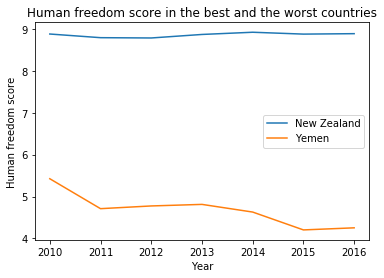

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert year values to integers, saving results back to dataframe
plt.xlabel('Year')
plt.ylabel('Human freedom score')

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
yemen = [5.425224, 4.710594, 4.775506, 4.812705, 4.629535, 4.203442, 4.253278]
newzealand = [8.879077, 8.791730, 8.784639, 8.868585, 8.921386, 8.876890, 8.887410]
plt.plot(years, newzealand, label='New Zealand')
plt.plot(years, yemen, label='Yemen')
plt.title('Human freedom score in the best and the worst countries')
plt.legend()


In [25]:

#best ratings: New Zealand, Switzerland, Canada, Finland
#worst ratings: Yemen, Myanmar, Zimbabwe, Algeria
#Nende riikidega nt teha võrdlusi

### Calculating the change of the human freedom ranking from 2010 to 2016

In [26]:
data_2010 = merged_data[merged_data['year'] == 2010]
data_2016 = merged_data[merged_data['year'] == 2016]

countries_and_ranks = {}
for i in data_2010.iterrows():
    countries_and_ranks[i[1]['countries']] = [i[1]['hf_rank'], ""]
for i in data_2016.iterrows():
    countries_and_ranks[i[1]['countries']][1] = i[1]['hf_rank']

rank_change = {}
for key in countries_and_ranks:
    rank_change[key] = countries_and_ranks[key][1] - countries_and_ranks[key][0]

rank_change = sorted(rank_change.items(), key=lambda x:x[1])

### Biggest decreasers by rank

In [27]:
rank_change[0:10]

[("Cote d'Ivoire", -36.0),
 ('Lesotho', -32.0),
 ('Haiti', -28.0),
 ('Jordan', -25.0),
 ('Uganda', -25.0),
 ('Benin', -24.0),
 ('Mexico', -20.0),
 ('Qatar', -20.0),
 ('Togo', -20.0),
 ('Ecuador', -19.0)]

### Biggest gainers by rank

In [28]:
rank_change[-10: len(rank_change)]

[('Timor-Leste', 21.0),
 ('Zambia', 21.0),
 ('Argentina', 23.0),
 ('Niger', 28.0),
 ('Ukraine', 29.0),
 ('Turkey', 32.0),
 ('Thailand', 34.0),
 ('Brunei Darussalam', 43.0),
 ('Tajikistan', 43.0),
 ('Brazil', 55.0)]